# There are 13 actions:
**1	Jumping in place	
2	Jumping jacks	
3	Bending - hands up all the way down	
4	Punching (boxing)	
5	Waving - two hands	
6	Waving - one hand (right)
7	Clapping hands	
8	Throwing a ball
9	Sit down then stand up	
10	Sit down	
11	Stand up	
12	T-pose**

# Data Storage Format

- The files in database are in format of "txt".In txt files there are joint coordinates of 43 markers in human body in order.


# Let's start code!
**First, we import pandas and os library.Then, we iterate over all txt files and collect all joint data with labels in a dataframe.Every row of dataframe is a action in a sample, and there are 129 xyz joint coordinates and 1 class label named 'classs' column.**

In [16]:
import pandas as pd
import os
path = '/kaggle/input/berkeley-multimodal-human-action-database/'

full_data = pd.DataFrame()

for entry in sorted(os.listdir(path)):
    if os.path.isfile(os.path.join(path, entry)):
        if entry.endswith('.txt'):
            data = pd.read_csv(path+entry,sep=' ',header=None)
            data.drop([129,130],inplace=True,axis=1)
            data['classs'] = entry[-10:-8]
            full_data = pd.concat([full_data,data],ignore_index=True)

**Let's check the data size of data.There are 2401920 rows(samples) and 130 features, last feature named 'classs' is label of that row.**

In [4]:
full_data.shape

(2401920, 130)

**When we check data types of the dataframe we can clearly see that first 129 rows are x,y,z features in format of float and the last column named 'classs' is object in string format which is labels.**

In [3]:
full_data.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
125       float64
126       float64
127       float64
128       float64
classs     object
Length: 130, dtype: object

**Let's have a look to data.**

In [4]:
full_data.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,classs
0,535.633972,1596.885742,182.630203,638.731995,1557.109741,103.225571,478.292816,1529.775635,36.972523,470.245300,...,387.926392,151.815430,78.476036,400.183411,37.893978,49.051929,384.553955,44.167561,119.841316,01
1,535.525940,1597.152832,183.330444,638.749329,1557.116211,103.531601,478.020782,1530.198242,37.841022,470.252930,...,387.690735,151.693314,78.362648,400.167511,37.912468,49.064564,384.611206,44.061180,119.831841,01
2,535.596985,1597.039429,183.522781,638.780151,1557.109253,103.958931,478.092926,1530.162109,37.929157,470.279816,...,387.755524,151.714722,78.404068,400.146179,37.915264,49.033600,384.590485,44.102978,119.838036,01
3,535.639526,1597.143188,184.039703,638.775635,1557.160278,104.183563,477.950867,1530.371582,38.480976,470.298187,...,387.915710,151.737381,78.505905,400.148834,37.911430,49.032551,384.516388,44.200638,119.834976,01
4,535.655212,1597.121704,184.348969,638.669312,1557.312012,104.405937,477.942841,1530.448730,38.754547,470.311096,...,387.863953,151.710251,78.485397,400.103546,37.932167,49.079586,384.530640,44.183495,119.837440,01


**In this section, I want to have a look to memory usage of dataframe.You know that kaggle provide us 16GB memory and this dataframe is quaite big.I just wanted to see that "can kaggle hardware handle this?"**

In [5]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401920 entries, 0 to 2401919
Columns: 130 entries, 0 to classs
dtypes: float64(129), object(1)
memory usage: 2.3+ GB


**In this section, we split data as features and label."x" variable is features and "y" variable is label of that features in order.**

In [17]:
x = full_data.drop(["classs"],axis=1)
y = full_data.classs.values
x.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,535.633972,1596.885742,182.630203,638.731995,1557.109741,103.225571,478.292816,1529.775635,36.972523,470.245300,...,82.758965,387.926392,151.815430,78.476036,400.183411,37.893978,49.051929,384.553955,44.167561,119.841316
1,535.525940,1597.152832,183.330444,638.749329,1557.116211,103.531601,478.020782,1530.198242,37.841022,470.252930,...,82.767532,387.690735,151.693314,78.362648,400.167511,37.912468,49.064564,384.611206,44.061180,119.831841
2,535.596985,1597.039429,183.522781,638.780151,1557.109253,103.958931,478.092926,1530.162109,37.929157,470.279816,...,82.805794,387.755524,151.714722,78.404068,400.146179,37.915264,49.033600,384.590485,44.102978,119.838036
3,535.639526,1597.143188,184.039703,638.775635,1557.160278,104.183563,477.950867,1530.371582,38.480976,470.298187,...,82.827797,387.915710,151.737381,78.505905,400.148834,37.911430,49.032551,384.516388,44.200638,119.834976
4,535.655212,1597.121704,184.348969,638.669312,1557.312012,104.405937,477.942841,1530.448730,38.754547,470.311096,...,82.962585,387.863953,151.710251,78.485397,400.103546,37.932167,49.079586,384.530640,44.183495,119.837440


**("y") Label data is in format of string,for 01-11 classes are basicly can be convertable to integer.But 12th class is like "t-" which is a string.So in this section we replace "t-" with "12" and convert it to integer.**

In [18]:
y = pd.DataFrame(y)
y.iloc[:,0] = y.iloc[:,0].str.replace('t','1')
y.iloc[:,0] = y.iloc[:,0].str.replace('-','2')
y.astype('int32')

,0
0,1
1,1
2,1
3,1
4,1
...,...
2401915,12
2401916,12
2401917,12
2401918,12


**Now, we can split data as train and test data.**

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,shuffle=True)

print('Shape of train data is : ',x_train.shape)
print('Shape of label data is : ',y_train.shape)

Shape of train data is :  (1801440, 129)
Shape of label data is :  (1801440, 1)


In [20]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
from keras.callbacks import EarlyStopping
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Dropout

early_stop = EarlyStopping(monitor='loss', patience=5)

# Define input layer
input_layer = Input(shape=(129,))

# Build the model using the Functional API
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.5)(x)  # Add dropout
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)

# Change the number of units in the final layer to match the number of classes
output_layer = Dense(13, activation='softmax')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

from keras.optimizers import Adam

# Define your learning rate
custom_learning_rate = 0.0001

# Create an Adam optimizer with the custom learning rate
custom_optimizer = Adam(learning_rate=custom_learning_rate)

# Compile the model
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 129)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16640     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0   

In [22]:
# Train the model
hist = model.fit(x_train, y_train, epochs=10, validation_split=0.20, batch_size=64,callbacks=[early_stop])

Train on 1441152 samples, validate on 360288 samples
Epoch 1/10
1441152/1441152 [==============================] - 163s 113us/step - loss: 4.6362 - accuracy: 0.3619 - val_loss: 2.8305 - val_accuracy: 0.2084
Epoch 2/10
1441152/1441152 [==============================] - 165s 114us/step - loss: 1.3881 - accuracy: 0.5052 - val_loss: 2.4550 - val_accuracy: 0.2772
Epoch 3/10
1441152/1441152 [==============================] - 161s 112us/step - loss: 1.2766 - accuracy: 0.5373 - val_loss: 2.3797 - val_accuracy: 0.2887
Epoch 4/10
1441152/1441152 [==============================] - 161s 112us/step - loss: 1.2027 - accuracy: 0.5738 - val_loss: 2.3519 - val_accuracy: 0.2933
Epoch 5/10
1441152/1441152 [==============================] - 161s 112us/step - loss: 1.1356 - accuracy: 0.6041 - val_loss: 2.2377 - val_accuracy: 0.3151
Epoch 6/10
1441152/1441152 [==============================] - 162s 113us/step - loss: 1.0894 - accuracy: 0.6219 - val_loss: 2.2591 - val_accuracy: 0.3208
Epoch 7/10
1441152/1441

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


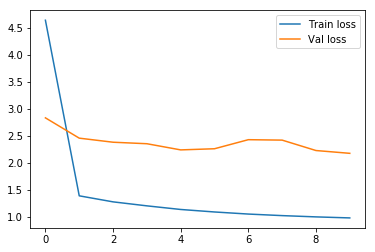

In [23]:
from matplotlib import pyplot as plt
print(hist.history.keys())

plt.plot(hist.history['loss'],label = 'Train loss')
plt.plot(hist.history['val_loss'],label = 'Val loss')
plt.legend()
plt.show()

In [24]:
# Assuming 'accuracy' is one of the metrics specified when compiling the model
evaluation_results = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {evaluation_results[1] * 100:.2f}%')

600480/600480 [==============================] - 21s 35us/step
Test Accuracy: 38.50%


In [14]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have the 'hist' object from model training
# Extract training predictions
y_train_pred = np.argmax(model.predict(x_train), axis=1)

# Extract training true labels
y_train_true = np.argmax(y_train, axis=1)

# Compute confusion matrix for training
conf_matrix_train = confusion_matrix(y_train_true, y_train_pred)

# Print confusion matrix for training
print("Confusion Matrix - Training:")
print(conf_matrix_train)

# Compute and print classification report for training
print("\nClassification Report - Training:")
print(classification_report(y_train_true, y_train_pred))

Confusion Matrix - Training:
[[  3921      3      0    836      0  98856      0   1093   2425      0
       0      0]
 [ 13709     92      0  61230      6  26745      0  36939   1231      0
       0      0]
 [  3169  28016 184067  16503  83865  15678      0    838   1540      0
       0      0]
 [115905     32      0    226      7  60331      0    667   1237      0
       0      0]
 [  3315   9852      0 140598    440  21172      0   4737   1920      0
       0      0]
 [   527      0      0    315      0 132565      0    199  57051      0
       0      0]
 [ 22290      0      0     97      0  71171      0    388    474      0
       0      0]
 [  2476      2      0    141      0  61244      0    295    339      0
       0      0]
 [   172      3      0     68      0   2591      0     44 370706      0
       0      0]
 [    60      0      0      7      0   2972      0      1  61389      0
       0      0]
 [     5      0      0      0      0   1460      0      2  50468      0
       0 

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           1       0.02      0.04      0.03    107134
           2       0.00      0.00      0.00    139952
           3       1.00      0.55      0.71    333676
           4       0.00      0.00      0.00    178405
           5       0.01      0.00      0.00    182034
           6       0.27      0.70      0.39    190657
           7       0.00      0.00      0.00     94420
           8       0.01      0.00      0.01     64497
           9       0.68      0.99      0.80    373584
          10       0.00      0.00      0.00     64429
          11       0.00      0.00      0.00     51935
          12       0.00      0.00      0.00     20717

    accuracy                           0.38   1801440
   macro avg       0.17      0.19      0.16   1801440
weighted avg       0.36      0.38      0.34   1801440



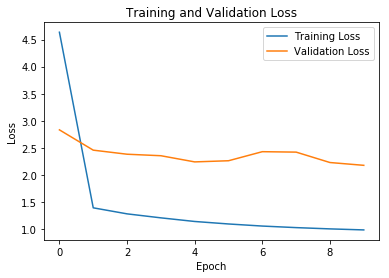

In [26]:
# Plot training loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()